## Imports

In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style(style="whitegrid")
from IPython.display import clear_output
import time

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

## Inspection

Read the data in from `.json` files:

In [41]:
df1 = pd.read_json('data/StreamingHistory0.json')
df2 = pd.read_json('data/StreamingHistory1.json')

Taking a peek at the pandas DataFrames

In [47]:
df1.head()

,endTime,artistName,trackName,msPlayed
0,2021-05-28 20:41,Leehom Wang,你不知道的事,59086
1,2022-04-21 00:01,BIGBANG,Still Life,188369
2,2022-04-21 00:04,BIGBANG,Still Life,188369
3,2022-04-21 00:07,BIGBANG,Still Life,188369
4,2022-04-21 00:08,BIGBANG,Still Life,31188


In [45]:
df1.tail()

,endTime,artistName,trackName,msPlayed
9995,2022-12-14 03:57,Lil Uzi Vert,Just Wanna Rock,123890
9996,2022-12-14 04:02,Lana Del Rey,Did you know that there's a tunnel under Ocean...,285050
9997,2022-12-14 04:05,Stephen Sanchez,Until I Found You,177720
9998,2022-12-14 04:08,SZA,Shirt,181830
9999,2022-12-14 04:11,Harry Styles,As It Was,167303


In [44]:
df2.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-14 04:13,d4vd,Romantic Homicide,132630
1,2022-12-14 04:16,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,182666
2,2022-12-14 04:18,Meghan Trainor,Made You Look,134256
3,2022-12-14 04:22,Arcángel,La Jumpa,255693
4,2022-12-14 04:25,David Guetta,I'm Good (Blue),175238


In [46]:
df2.tail()

,endTime,artistName,trackName,msPlayed
4094,2023-04-20 06:29,Michael Wong,天堂,217053
4095,2023-04-20 07:03,NewJeans,Cookie,187870
4096,2023-04-20 07:15,Rachel Liang,分手後不要做朋友,1023
4097,2023-04-20 07:23,FIFTY FIFTY,Cupid - Twin Ver.,146752
4098,2023-04-20 07:51,Raon,残酷な天使のテーゼ,241253


In [15]:
test = df1.groupby('artistName').size().sort_values(ascending=False).to_frame().reset_index().rename({0:'count'}, axis=1)
top_20 = test.head(20)
top_20

,artistName,count
0,Post Malone,1365
1,BIBI,557
2,Lauv,542
3,Halsey,480
4,The Kid LAROI,419
5,88rising,417
6,Alan Walker,380
7,Lil Nas X,286
8,Aimer,265
9,Marshmello,245


In [21]:
top_20[top_20['artistName']=="梶浦 由記"].index[0]

13

In [6]:
top_20.loc[13, 'artistName'] = "Yuki Kajiura"
top_20

,artistName,count
0,Post Malone,1365
1,BIBI,557
2,Lauv,542
3,Halsey,480
4,The Kid LAROI,419
5,88rising,417
6,Alan Walker,380
7,Lil Nas X,286
8,Aimer,265
9,Marshmello,245


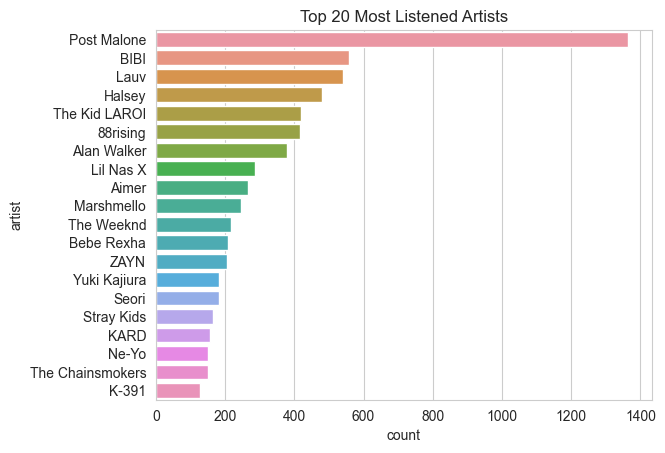

In [7]:
sns.barplot(data=top_20, y='artistName', x='count')
plt.title("Top 20 Most Listened Artists")
plt.ylabel("artist")
plt.show()

In [22]:
def barplot_helper(df, step):

    #intial configuration

    for i in range(step, 10001, step):
        # clear the plot
        clear_output(wait=True)
        # get slice of df
        curr_df = df[:i]

        # perform groupby
        curr_df = curr_df.groupby('artistName').size().sort_values(ascending=False).to_frame().reset_index().rename({0:'count'}, axis=1)
        curr_df_top_20 = curr_df.head(20)
        plt.clf()
        sns.barplot(data=curr_df_top_20, y='artistName', x='count')
        plt.title("Top 20 Most Listened Artists")
        plt.ylabel("artist")
        plt.pause(10e-10)
        plt.show()                                                                                           

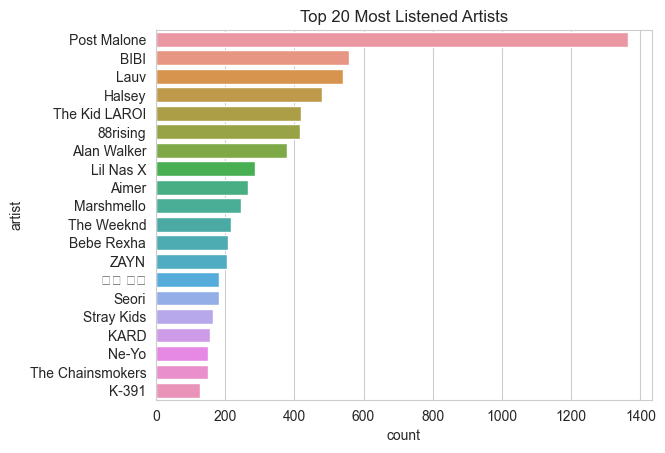

In [23]:
barplot_helper(df1, 50)

In [28]:
df1

,endTime,artistName,trackName,msPlayed
0,2021-05-28 20:41,Leehom Wang,你不知道的事,59086
1,2022-04-21 00:01,BIGBANG,Still Life,188369
2,2022-04-21 00:04,BIGBANG,Still Life,188369
3,2022-04-21 00:07,BIGBANG,Still Life,188369
4,2022-04-21 00:08,BIGBANG,Still Life,31188
...,...,...,...,...
9995,2022-12-14 03:57,Lil Uzi Vert,Just Wanna Rock,123890
9996,2022-12-14 04:02,Lana Del Rey,Did you know that there's a tunnel under Ocean...,285050
9997,2022-12-14 04:05,Stephen Sanchez,Until I Found You,177720
9998,2022-12-14 04:08,SZA,Shirt,181830


In [29]:
df2

,endTime,artistName,trackName,msPlayed
0,2022-12-14 04:13,d4vd,Romantic Homicide,132630
1,2022-12-14 04:16,Metro Boomin,Superhero (Heroes & Villains) [with Future & C...,182666
2,2022-12-14 04:18,Meghan Trainor,Made You Look,134256
3,2022-12-14 04:22,Arcángel,La Jumpa,255693
4,2022-12-14 04:25,David Guetta,I'm Good (Blue),175238
...,...,...,...,...
4094,2023-04-20 06:29,Michael Wong,天堂,217053
4095,2023-04-20 07:03,NewJeans,Cookie,187870
4096,2023-04-20 07:15,Rachel Liang,分手後不要做朋友,1023
4097,2023-04-20 07:23,FIFTY FIFTY,Cupid - Twin Ver.,146752


In [33]:
pd.concat([df1, df2])

,endTime,artistName,trackName,msPlayed
0,2021-05-28 20:41,Leehom Wang,你不知道的事,59086
1,2022-04-21 00:01,BIGBANG,Still Life,188369
2,2022-04-21 00:04,BIGBANG,Still Life,188369
3,2022-04-21 00:07,BIGBANG,Still Life,188369
4,2022-04-21 00:08,BIGBANG,Still Life,31188
...,...,...,...,...
4094,2023-04-20 06:29,Michael Wong,天堂,217053
4095,2023-04-20 07:03,NewJeans,Cookie,187870
4096,2023-04-20 07:15,Rachel Liang,分手後不要做朋友,1023
4097,2023-04-20 07:23,FIFTY FIFTY,Cupid - Twin Ver.,146752
